In [4]:
#Preparing Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
#Accessing the Data
Path = 'Assignment1_StreamFlow_Subscription_Data.csv'
Subscrip = pd.read_csv(Path)

#First Glance At the Data
Subscrip.head()


,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [6]:
#Gathering more Info about Columns & Data Types
Subscrip.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [16]:
#Converting Subscription Start Date to the correct Data Type of "DateTime"
Subscrip['Subscription_Start_Date'] = pd.to_datetime(Subscrip['Subscription_Start_Date'])
 
#Converting Date_of_Churn to the correct Data type of "Datetime"
Subscrip['Date_of_Churn'] = pd.to_datetime(Subscrip['Date_of_Churn'])

#Converting Churned to the correct Data Type of "Binary"
Subscrip['Churned'] = Subscrip['Churned'].astype(bool)

#Checking the Data types again to ensure all of them are in the right format now
print(Subscrip.dtypes)

User_ID                             int64
Age                                 int64
Gender                             object
Location                           object
Subscription_Start_Date    datetime64[ns]
Subscription_Type                  object
Monthly_Payment                   float64
Payment_Method                     object
Monthly_Hours_Watched             float64
Favorite_Genre                     object
Devices_Used                       object
Average_Session_Length            float64
Content_ID                          int64
Rating_Given                        int64
Churned                              bool
Date_of_Churn              datetime64[ns]
Reason_for_Churn                   object
dtype: object


In [7]:
#Generating Summary Statistics to understand the dispersion of data
Subscrip.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [8]:
#Checking for Missing Values
missing_values = Subscrip.isnull()

#Quantifying Missing Values
missing_values_Sum = Subscrip.isnull().sum()
print(missing_values_Sum)

User_ID                      0
Age                          0
Gender                       0
Location                     0
Subscription_Start_Date      0
Subscription_Type            0
Monthly_Payment              0
Payment_Method               0
Monthly_Hours_Watched        0
Favorite_Genre               0
Devices_Used                 0
Average_Session_Length       0
Content_ID                   0
Rating_Given                 0
Churned                      0
Date_of_Churn              754
Reason_for_Churn           754
dtype: int64


In [30]:
#Finding the Percentage of Missing Values for Each Coloumn 
percentage_of_data_missing_per_coloumn = (missing_values_Sum / len(Subscrip)) * 100
print(percentage_of_data_missing_per_coloumn)

User_ID                     0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Subscription_Start_Date     0.0
Subscription_Type           0.0
Monthly_Payment             0.0
Payment_Method              0.0
Monthly_Hours_Watched       0.0
Favorite_Genre              0.0
Devices_Used                0.0
Average_Session_Length      0.0
Content_ID                  0.0
Rating_Given                0.0
Churned                     0.0
Date_of_Churn              75.4
Reason_for_Churn           75.4
dtype: float64


In [ ]:
#Dropping the column "User ID" as its not useful in this particular case
Subscrip.drop(columns=['User_ID'], inplace=True)

In [ ]:
#Dropping the column "User ID" as its not useful in this particular case
Subscrip.drop(columns=['Content_ID'], inplace=True)

<Axes: ylabel='Count'>

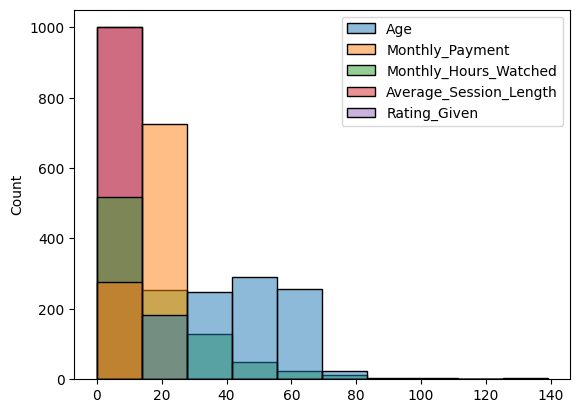

In [34]:
#Creating Histogram to detect any patterns for numerical data
numerical_columns = ['Age', 'Monthly_Payment', 'Monthly_Hours_Watched', 'Average_Session_Length', 'Rating_Given']
sns.histplot(Subscrip[numerical_columns], bins=10)